# How Machine Learning models can predicting if a track would be a "Hit" song or not 

This notebook looks into various Python-based machine learning and data science libraries, in an attempt to build a machine learning model capable of predicting whether a track would be a "Hit" or not, based on their attributes.

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given musical parameters about a track, can we predict whether or not it would be a "Hit" or not?

## 2. Data

This is a dataset consisting of features for tracks fetched using Spotify's Web API. The tracks are labeled '1' or '0' ('Hit' or 'Flop') depending on some criteria of the author.
The dataset starting from Jan 1st, 2010, ending at Dec 31st, 2019.

The dataset has been downloaded from Kaggle:
https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset?select=dataset-of-10s.csv

## 3. Evaluation

> If we can reach X% accuracy whether or not a track would be a hit during the proof of concept, we will pursue the project

## 4. Features

Attributes information
1. track: The Name of the track.

2. artist: The Name of the Artist.

3. uri: The resource identifier for the track.

4. danceability: describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable. 

5. energy:measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

6. key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.

7. loudness: The overall loudness of a track in decibels (dB).Values typical range between -60 and 0 db. 

8. mode: indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

9. speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

10. acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:

11. instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

12. liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

13. valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

14. tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

15. duration_ms:  The duration of the track in milliseconds.

16. time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

17. chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.

18. sections: The number of sections the particular track has. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.

19. target: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.

### Preparing the tools
we are going to use pandas, matplotlib, numpy, seaborn

In [4]:
!pip install seaborn

In [6]:
# Import all the tools we need

#Regular EDA(Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# we want our plot to appear inside the notebook

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix ,precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve



# Load data


In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/fortyTwo102/The-Spotify-Hit-Predictor-Dataset/master/dataset-of-10s.csv')

In [20]:
df.shape


(6398, 19)

In [25]:
## EDA:

#1.	What question(s) are you trying to solve (or prove wrong)?
#2.	What kind of data do you have and how do you treat different types?
#3.	What’s missing from the data and how do you deal with it?
#4.	Where are the outliers and why should you care about them?
#5.	How can you add, change or remove features to get more out of your data?


In [27]:
df.head()



,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [26]:
df.tail()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
6393,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.314,0.0361,72.272,150857,4,24.30824,7,0
6394,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.261,0.7400,119.985,152000,4,32.53856,8,1
6395,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.139,0.6050,119.999,227760,4,20.73371,7,1
6396,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.149,0.5600,120.030,213387,4,21.65301,14,0
6397,Dust,Hans Zimmer,spotify:track:2khIaVUkbMmDHB596lyMG3,0.121,0.123,4,-23.025,0,0.0443,0.9640,0.696000,0.103,0.0297,95.182,341396,4,71.05343,15,0


In [31]:
df.target.value_counts() 

1    3199
0    3199
Name: target, dtype: int64

In [33]:
df.key.value_counts()

1     751
0     715
7     682
2     584
11    572
9     560
6     513
5     507
4     452
8     445
10    421
3     196
Name: key, dtype: int64

In [35]:
df.time_signature.value_counts()

4    5799
3     436
5     121
1      41
0       1
Name: time_signature, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6398 non-null   object 
 1   artist            6398 non-null   object 
 2   uri               6398 non-null   object 
 3   danceability      6398 non-null   float64
 4   energy            6398 non-null   float64
 5   key               6398 non-null   int64  
 6   loudness          6398 non-null   float64
 7   mode              6398 non-null   int64  
 8   speechiness       6398 non-null   float64
 9   acousticness      6398 non-null   float64
 10  instrumentalness  6398 non-null   float64
 11  liveness          6398 non-null   float64
 12  valence           6398 non-null   float64
 13  tempo             6398 non-null   float64
 14  duration_ms       6398 non-null   int64  
 15  time_signature    6398 non-null   int64  
 16  chorus_hit        6398 non-null   float64


In [38]:
df.isna().sum()
#no missing values

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [113]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [281]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)



track
artist
uri


In [282]:
# Turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [283]:
df_tmp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Columns: 19 entries, track to target
dtypes: category(3), float64(10), int64(6)
memory usage: 1.6 MB


In [284]:
df_tmp.info("uri")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Dtype   
---  ------            -----   
 0   track             category
 1   artist            category
 2   uri               category
 3   danceability      float64 
 4   energy            float64 
 5   key               int64   
 6   loudness          float64 
 7   mode              int64   
 8   speechiness       float64 
 9   acousticness      float64 
 10  instrumentalness  float64 
 11  liveness          float64 
 12  valence           float64 
 13  tempo             float64 
 14  duration_ms       int64   
 15  time_signature    int64   
 16  chorus_hit        float64 
 17  sections          int64   
 18  target            int64   
dtypes: category(3), float64(10), int64(6)
memory usage: 1.6 MB


In [117]:
df_tmp.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292538,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


In [82]:
#pd.set_option('display.expand_frame_repr', True)
pd.set_option('expand_frame_repr', False)

print(df[df.energy==df.energy.max()])

#pd.set_option('display.max_columns', None)  
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

         track            artist                                   uri  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence    tempo  duration_ms  time_signature  chorus_hit  sections  target
200  Sacrifice  Invincible Force  spotify:track:2CUGyAEW4rtVyZYSyVKKp3  0.267         0.999   1   -3.412     0     0.131        0.00285       0.00257           0.104     0.0381   181.013  227879       4               28.3693     11        0     


In [63]:
print(df[df.energy==df.energy.max()])

         track            artist                                   uri  \
200  Sacrifice  Invincible Force  spotify:track:2CUGyAEW4rtVyZYSyVKKp3   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
200         0.267   0.999    1    -3.412     0        0.131       0.00285   

     instrumentalness  liveness  valence    tempo  duration_ms  \
200           0.00257     0.104   0.0381  181.013       227879   

     time_signature  chorus_hit  sections  target  
200               4     28.3693        11       0  


In [119]:
pd.crosstab(df_tmp.key,df_tmp.target)


target,0,1
key,,
0,360,355
1,335,416
2,315,269
3,105,91
4,256,196
5,262,245
6,247,266
7,358,324
8,180,265


In [102]:
df.groupby('key').mean()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
key,,,,,,,,,,,,,,,
0,0.562199,0.627777,-8.054449,0.737063,0.085572,0.267084,0.180863,0.185984,0.457214,121.179427,233160.570629,3.934266,40.879832,10.186014,0.496503
1,0.611563,0.690098,-7.004847,0.728362,0.120703,0.149658,0.129140,0.199957,0.429418,123.295826,231235.306258,3.968043,41.221211,10.201065,0.553928
2,0.551071,0.678673,-7.581144,0.818493,0.091360,0.204705,0.173236,0.192663,0.423588,122.259810,237687.116438,3.910959,40.735181,10.328767,0.460616
3,0.503398,0.584439,-9.109913,0.658163,0.080706,0.340257,0.225334,0.164742,0.412445,119.412128,248321.607143,3.897959,41.574575,10.846939,0.464286
4,0.530768,0.680813,-7.424825,0.539823,0.082198,0.236667,0.192650,0.218751,0.428557,123.731765,241858.960177,3.924779,41.611854,10.387168,0.433628
5,0.552988,0.635682,-8.249464,0.526627,0.087411,0.275353,0.186661,0.187601,0.451165,123.113677,242102.161736,3.915187,40.666126,10.633136,0.483235
6,0.572829,0.700543,-7.061772,0.518519,0.104091,0.168394,0.154336,0.194797,0.457796,120.096039,237361.446394,3.925926,39.663468,10.286550,0.518519
7,0.568652,0.681213,-7.462151,0.775660,0.094107,0.220136,0.171825,0.201093,0.459936,123.047717,235205.224340,3.939883,41.221224,10.271261,0.475073
8,0.591938,0.670350,-7.048364,0.739326,0.108684,0.201154,0.131599,0.195882,0.447532,119.996238,227809.489888,3.941573,41.939608,10.006742,0.595506


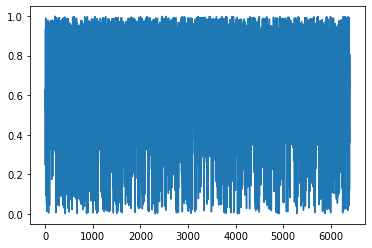

In [121]:
df_tmp.energy.plot()

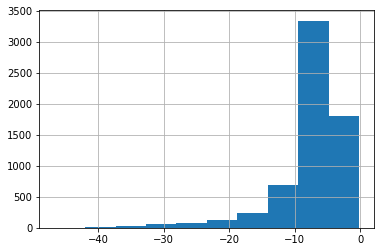

In [122]:
df_tmp.loudness.hist()

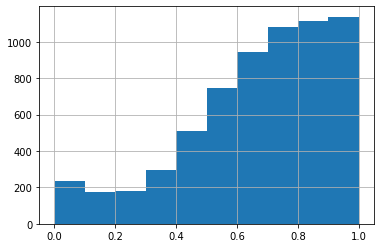

In [123]:
df_tmp.energy.hist()

In [124]:
df_tmp.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [105]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.069645,0.012429,0.300576,-0.057280,0.200090,-0.206865,-0.371334,-0.107581,0.494136,-0.056197,-0.224803,0.178671,-0.078254,-0.162908,0.384486
energy,0.069645,1.000000,0.028703,0.774536,0.004929,0.119194,-0.734853,-0.288263,0.231393,0.281031,0.216886,-0.009228,0.175984,-0.001224,-0.074466,0.060701
key,0.012429,0.028703,1.000000,0.010824,-0.146063,0.022796,-0.021271,-0.013049,0.021785,0.019572,0.009259,0.011028,-0.008462,0.001960,0.002512,0.005548
loudness,0.300576,0.774536,0.010824,1.000000,0.021064,0.122028,-0.648717,-0.533671,0.126807,0.324985,0.194467,-0.094598,0.207436,-0.042665,-0.111469,0.327471
mode,-0.057280,0.004929,-0.146063,0.021064,1.000000,-0.090107,0.011424,-0.037132,-0.011590,0.018198,0.032180,-0.042125,0.014125,-0.007967,-0.030129,0.032021
speechiness,0.200090,0.119194,0.022796,0.122028,-0.090107,1.000000,-0.134226,-0.148649,0.121075,0.053836,0.117813,-0.071826,0.063656,0.001857,-0.035077,0.097783
acousticness,-0.206865,-0.734853,-0.021271,-0.648717,0.011424,-0.134226,1.000000,0.315563,-0.149926,-0.166253,-0.182050,-0.039567,-0.191607,0.001477,0.024583,-0.184479
instrumentalness,-0.371334,-0.288263,-0.013049,-0.533671,-0.037132,-0.148649,0.315563,1.000000,-0.049879,-0.334662,-0.083487,0.183696,-0.133629,0.093847,0.114927,-0.499624
liveness,-0.107581,0.231393,0.021785,0.126807,-0.011590,0.121075,-0.149926,-0.049879,1.000000,-0.016562,0.038555,0.040219,0.026185,0.043099,0.008406,-0.062612
valence,0.494136,0.281031,0.019572,0.324985,0.018198,0.053836,-0.166253,-0.334662,-0.016562,1.000000,0.053572,-0.248445,0.117049,-0.103274,-0.168675,0.203774


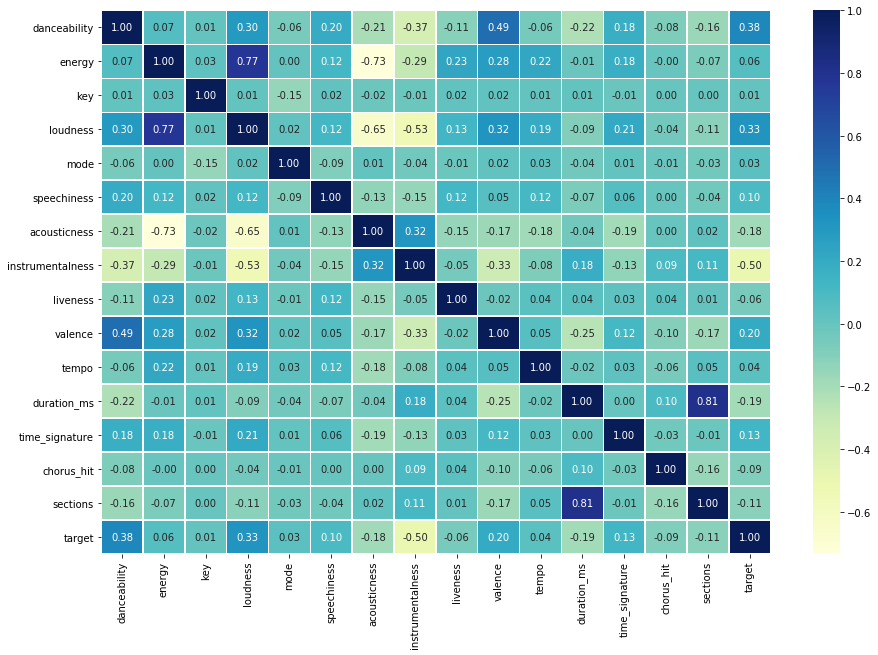

In [125]:
corr_matrix = df_tmp.corr() 
plt.figure(figsize=(15, 10)) 
sns.heatmap(corr_matrix,
            annot=True,              
            linewidths=0.5,              
            fmt= ".2f",              
            cmap="YlGnBu"); 

#as danceability goes up, the target also goes up
#as instrumentals goes down, the target goes up...

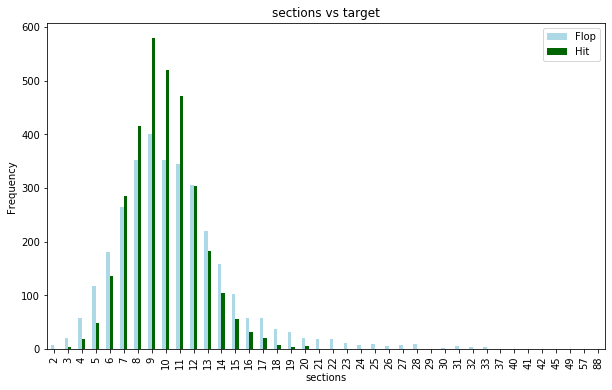

In [130]:
# Create a new crosstab and base plot 
pd.crosstab(df_tmp.sections, df_tmp.target).plot(kind="bar",                                     
                                   figsize=(10,6),                                     
                                   color=["lightblue", "darkgreen"])  
# Add attributes to the plot to make it more readable 
plt.title("sections vs target") 
plt.xlabel("sections") 
plt.ylabel("Frequency") 
plt.legend(["Flop", "Hit"]) 
#plt.xticks(rotation = 0); 

In [131]:
df_tmp.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [132]:
df_tmp.head().T

,0,1,2,3,4
track,Wild Things,Surfboard,Love Someone,Music To My Ears (feat. Tory Lanez),Juju On That Beat (TZ Anthem)
artist,Alessia Cara,Esquivel!,Lukas Graham,Keys N Krates,Zay Hilfigerrr & Zayion McCall
uri,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,spotify:track:61APOtq25SCMuK0V5w2Kgp,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,spotify:track:0cjfLhk8WJ3etPTCseKXtk,spotify:track:1lItf5ZXJc1by9SbPeljFd
danceability,0.741,0.447,0.55,0.502,0.807
energy,0.626,0.247,0.415,0.648,0.887
key,1,5,9,0,1
loudness,-4.826,-14.661,-6.557,-5.698,-3.892
mode,0,0,0,0,1
speechiness,0.0886,0.0346,0.052,0.0527,0.275
acousticness,0.02,0.871,0.161,0.00513,0.00381


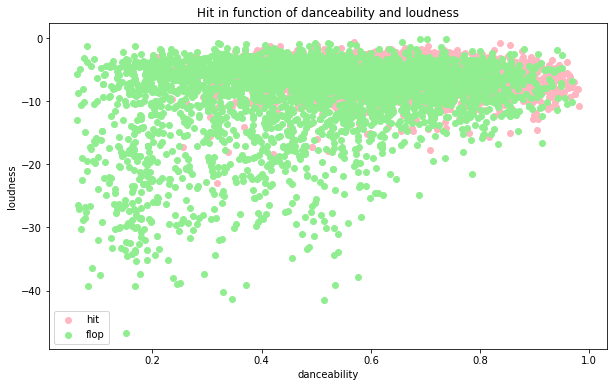

In [149]:
#Because there are so many different values for danceability and loudness, we'll use a scatter plot.

# Create another figure
plt.figure(figsize=(10,6))


# Start with positve examples
plt.scatter(df_tmp.danceability[df_tmp.target==1], 
            df_tmp.loudness[df_tmp.target==1], 
            c="lightpink") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df_tmp.danceability[df_tmp.target==0], 
            df_tmp.loudness[df_tmp.target==0], 
            c="lightgreen") # axis always come as (x, y)

plt.title("Hit in function of danceability and loudness")
plt.xlabel("danceability")
plt.ylabel("loudness")
plt.legend(["hit", "flop"]);

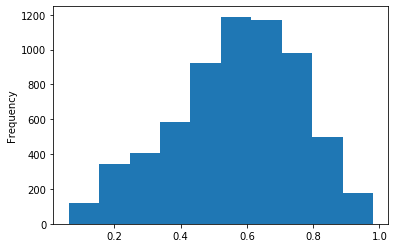

In [147]:
# Histograms are a great way to check the distribution of a variable
df_tmp.danceability.plot.hist();

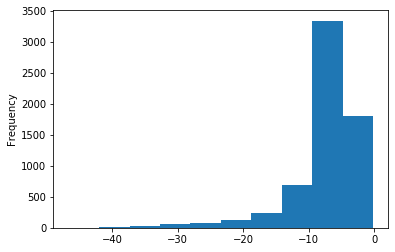

In [148]:
df_tmp.loudness.plot.hist();

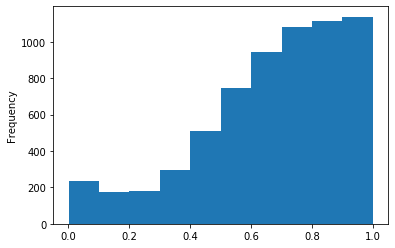

In [146]:
df_tmp.energy.plot.hist();

## 5. Modeling

In [156]:
# Split data into X and y
X = df_tmp.drop("target", axis=1)

y = df_tmp["target"]

In [157]:

# Split data into train and test sets
np.random.seed(33)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [153]:
y_train, len(y_train)

(2497    0
 3957    0
 4179    0
 6247    0
 316     0
        ..
 3273    0
 2706    1
 578     1
 5848    1
 2439    0
 Name: target, Length: 5118, dtype: int64,
 5118)

# Train and test 
Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier


In [158]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(33)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [237]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

ValueError: could not convert string to float: 'spotify:track:22oHNR2kqQKjyKpLbB6IUp'

In [227]:
#ValueError: could not convert string to float: 'spotify:track:22oHNR2kqQKjyKpLbB6IUp'
#the error must be because of the : in uri column, so it has to be removed 
df_tmp['uri'] = df_tmp['uri'].map(lambda x: x.strip(':'))
df_tmp

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify track 2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000000,0.0828,0.7060,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify track 61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814000,0.0946,0.2500,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify track 2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000000,0.1080,0.2740,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify track 0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000000,0.2040,0.2910,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify track 1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000000,0.3910,0.7800,160.517,144244,4,24.99199,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,Lotus Flowers,Yolta,spotify track 4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.88600,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0
6394,Calling My Spirit,Kodak Black,spotify track 2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.09960,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1
6395,Teenage Dream,Katy Perry,spotify track 55qBw1900pZKfXJ6Q9A2L,0.719,0.804,10,-4.581,1,0.0355,0.01320,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1
6396,Stormy Weather,Oscar Peterson,spotify track 4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.98900,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0


In [195]:
df_tmp.uri

0       spotify:track:2ZyuwVvV6Z3XJaXIFbspeE
1       spotify:track:61APOtq25SCMuK0V5w2Kgp
2       spotify:track:2JqnpexlO9dmvjUMCaLCLJ
3       spotify:track:0cjfLhk8WJ3etPTCseKXtk
4       spotify:track:1lItf5ZXJc1by9SbPeljFd
                        ...                 
6393    spotify:track:4t1TljQWJ6ZuoSY67zVvBI
6394    spotify:track:2MShy1GSSgbmGUxADNIao5
6395    spotify:track:55qBw1900pZKfXJ6Q9A2L 
6396    spotify:track:4o9npmYHrOF1rUxxTVH8h4
6397    spotify:track:2khIaVUkbMmDHB596lyMG3
Name: uri, Length: 6398, dtype: category
Categories (6378, object): [spotify:track:000JBwAOq5d9lNNSnovPYg < spotify:track:000xQL6tZNLJzIrtIgxqSl < spotify:track:002ZKDDKt6oObJzIQq5Mrv < spotify:track:003I0c4UcwPtqOp3rW7Dv7 ... spotify:track:7zbFh74zImpQho3btxuANN < spotify:track:7zmJyZL3DfYBBYbY8Rve6W < spotify:track:7zsXy7vlHdItvUSH8EwQss < spotify:track:7zy6jG8RIUI8qNYYVuLGbY]

In [271]:
#To be safe, Im goint to use a complete list of special characters and remove them using a loop:
# we replaced the special characters with space.
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df_tmp['uri'] = df_tmp['uri'].str.replace(char, ' ')

In [273]:
df_tmp['uri'] 

0       spotifytrack2ZyuwVvV6Z3XJaXIFbspeE
1       spotifytrack61APOtq25SCMuK0V5w2Kgp
2       spotifytrack2JqnpexlO9dmvjUMCaLCLJ
3       spotifytrack0cjfLhk8WJ3etPTCseKXtk
4       spotifytrack1lItf5ZXJc1by9SbPeljFd
                       ...                
6393    spotifytrack4t1TljQWJ6ZuoSY67zVvBI
6394    spotifytrack2MShy1GSSgbmGUxADNIao5
6395    spotifytrack55qBw1900pZKfXJ6Q9A2L 
6396    spotifytrack4o9npmYHrOF1rUxxTVH8h4
6397    spotifytrack2khIaVUkbMmDHB596lyMG3
Name: uri, Length: 6398, dtype: object

In [ ]:
Train and test
Now we've got our data split into training and test sets, it's time to build a machine learning model.
We'll train it (find the patterns) on the training set.
And we'll test it (use the patterns) on the test set.
We're going to try 3 different machine learning models:
Logistic Regression
K-Nearest Neighbours Classifier
Random Forest Classifier

## 5. Modeling

# keeping up...

## Train and test
Now we've got our data split into training and test sets, it's time to build a machine learning model.
We'll train it (find the patterns) on the training set.
And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [299]:
# Split data into X and y
X = df_tmp.drop("target", axis=1)

y = df_tmp["target"]

In [300]:

# Split data into train and test sets
np.random.seed(33)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [301]:
y_train, len(y_train)

(2497    0
 3957    0
 4179    0
 6247    0
 316     0
        ..
 3273    0
 2706    1
 578     1
 5848    1
 2439    0
 Name: target, Length: 5118, dtype: int64,
 5118)

In [302]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(33)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores



In [303]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.56796875,
 'KNN': 0.63046875,
 'Random Forest': 0.83671875}

In [292]:
df_tmp.info("uri")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Dtype   
---  ------            -----   
 0   track             category
 1   artist            category
 2   uri               category
 3   danceability      float64 
 4   energy            float64 
 5   key               int64   
 6   loudness          float64 
 7   mode              int64   
 8   speechiness       float64 
 9   acousticness      float64 
 10  instrumentalness  float64 
 11  liveness          float64 
 12  valence           float64 
 13  tempo             float64 
 14  duration_ms       int64   
 15  time_signature    int64   
 16  chorus_hit        float64 
 17  sections          int64   
 18  target            int64   
dtypes: category(3), float64(10), int64(6)
memory usage: 1.6 MB


In [293]:
# got the error again could not convert string to float: 
#so Ill try with turning categorical variables into numbers

# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

track
artist
uri


In [294]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [297]:
pd.Categorical(df_tmp["uri"]).codes+1

array([2121, 4916, 1930, ..., 4158, 3963, 2274], dtype=int16)

In [298]:
df_tmp.info("uri")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   track              int16  
 1   artist             int16  
 2   uri                int16  
 3   danceability       float64
 4   energy             float64
 5   key                int64  
 6   loudness           float64
 7   mode               int64  
 8   speechiness        float64
 9   acousticness       float64
 10  instrumentalness   float64
 11  liveness           float64
 12  valence            float64
 13  tempo              float64
 14  duration_ms        int64  
 15  time_signature     int64  
 16  chorus_hit         float64
 17  sections           int64  
 18  target             int64  
 19  track_is_missing   bool   
 20  artist_is_missing  bool   
 21  uri_is_missing     bool   
dtypes: bool(3), float64(10), int16(3), int64(6)
memory usage: 856.1 KB


# after turn all the categorical into numbers:
{'Logistic Regression': 0.56796875,
 'KNN': 0.63046875,
 'Random Forest': 0.83671875}

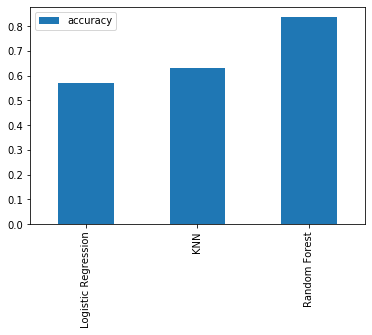

In [306]:
# Compare models:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

We've explored our dataset a little as well as enriched it with some datetime attributes, now let's try to model.

Why model so early?

We know the evaluation metric we're heading towards. We could spend more time doing exploratory data analysis (EDA), finding more out about the data ourselves but what we'll do instead is use a machine learning model to help us do EDA.

Remember, one of the biggest goals of starting any new machine learning project is reducing the time between experiments.
Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:(1 and 2 use in all models, the rest are specific to Classifications models)

1. Hypyterparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC curve
10. AUC

1. Hyperparameter tuning (by hand)



In [307]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [308]:
train_scores

[1.0,
 0.787221570926143,
 0.7881985150449394,
 0.7346619773348965,
 0.7330988667448222,
 0.714146150840172,
 0.7153184837827277,
 0.7049628761234857,
 0.7094568190699492,
 0.694021101992966,
 0.6910902696365768,
 0.6881594372801876,
 0.6832747166862055,
 0.6811254396248535,
 0.6811254396248535,
 0.6733098866744822,
 0.6770222743259086,
 0.6742868307932787,
 0.6756545525595936,
 0.6742868307932787]

In [309]:
test_scores

[0.59375,
 0.58359375,
 0.6203125,
 0.60390625,
 0.63046875,
 0.60546875,
 0.62109375,
 0.6171875,
 0.6296875,
 0.61796875,
 0.63359375,
 0.61484375,
 0.6265625,
 0.6265625,
 0.6390625,
 0.63359375,
 0.640625,
 0.640625,
 0.6578125,
 0.653125]

Maximum KNN score on the test data: 65.78%


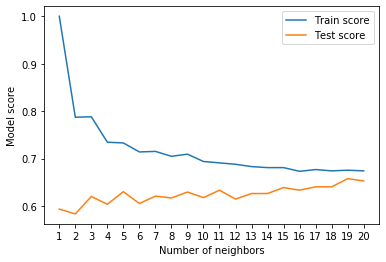

In [310]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

n=19 (by default is 5) yields the best score on our test data set, that gives 65.78%

65.78% is a little bit higher that the one I got at the first model 'KNN': 0.63046875,


{'Logistic Regression': 0.56796875,
 'KNN': 0.63046875,
 'Random Forest': 0.83671875}

even I tunned the KNN, the score didnt reach the score in Random Forest, so for now Im  going to discard KNN model...


This is quite tedious, It was okay here using tuning by hand, because I had one parameter tuned (n kneighbors) but if you had more parameters writing these for loops is going to be very inefficient.

So if I had to do that for every single machine learning model you might run into some problems.

It was okay here because we had one parameter tuned but if you had more parameters writing these for
loops is going to be very inefficient.

So what we might do next see how we can tune logistic regression and random forest classifier using
randomized search CV which stands for cross validation.

So instead of us having to manually try choosing different hybrid parameters by hand randomize search

CV which we've seen in the psychic loan section it's gonna try a number of different combinations of

## Hyperparameter tuning with RandomizedSearchCV
We're going to tune:

LogisticRegression()
RandomForestClassifier()
... using RandomizedSearchCV

{'Logistic Regression': 0.56796875, 'KNN': 0.63046875, 'Random Forest': 0.83671875}


CV=cross validation:
This can be k fold cross validation.
So 5 is the default in get line in the latest version but you can really adjust this and what it's going
to do is go on it create five different versions of training data and five different versions of the
test data and then evaluate different parameters Rama because we're doing a hyper parameter search evaluate
different hyper parameters on all of these different sets of all of these versions of the training and

In [318]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...



In [322]:
# Tune LogisticRegression

np.random.seed(33)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [321]:

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=True)

SyntaxError: invalid syntax (<ipython-input-321-fafa3251674b>, line 12)

In [324]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 545.5594781168514}

In [325]:
rs_log_reg.score(X_test, y_test)


0.734375


0.734375 vs 0.56796875

{'Logistic Regression': 0.56796875,
 'KNN': 0.63046875,
 'Random Forest': 0.83671875}



Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...



In [326]:
# Setup random seed
np.random.seed(33)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [327]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 860,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': None}

In [328]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8328125

## Hyperparamter Tuning with GridSearchCV
Since our RandomForestClassifier model provides the best scores so far, 
we'll try and improve them again using GridSearchCV...

lo que cambia de usar GridSearchCV o RandomizedSearchCV es que en lugar de escribir:
 param_distributions=rf_grid... usamos param_grid=...
 
" rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
 "...

In [337]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 100, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


# Setup grid hyperparameter search for LogisticRegression
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True)


In [338]:
# Fit grid hyperparameter search model
gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed: 19.9min finished


In [339]:
# Check the best hyperparmaters
gs_rf.best_params_


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 60}

In [340]:
# Evaluate the grid search LogisticRegression model
gs_rf.score(X_test, y_test)


0.8375

## Evaluting our tuned machine learning classifier, beyond accuracy
- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [341]:
# Make predictions with tuned model
y_preds = gs_rf.predict(X_test)

In [342]:

y_preds

array([1, 0, 1, ..., 0, 1, 0])

In [343]:

y_test

4922    1
4856    0
366     1
3597    0
1897    1
       ..
5767    0
3524    0
1616    0
3208    1
3931    0
Name: target, Length: 1280, dtype: int64

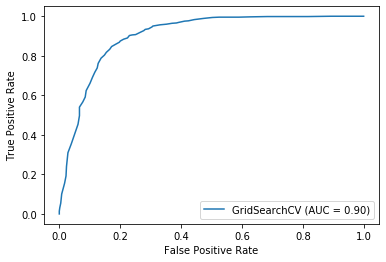

In [344]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_rf, X_test, y_test)

In [345]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[507 127]
 [ 81 565]]


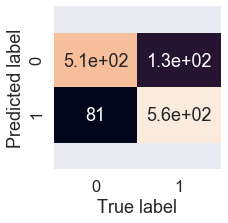

In [346]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, 
let's get a classification report as well as cross-validated precision, recall and f1-score.

In [354]:
from sklearn.metrics import classification_report

In [355]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       634
           1       0.82      0.87      0.84       646

    accuracy                           0.84      1280
   macro avg       0.84      0.84      0.84      1280
weighted avg       0.84      0.84      0.84      1280



## Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

we only make predictions on the dataset test (pred comes from test dataset, so we need a cross validation

Precision: indicates the proportion of positive identification so a.k.a. the model
predicts Class 1 which is has heart disease which were actually correct.(565?)
[[507 127]
 [ 81 565]]
  
So a model which produces no false positives right.
So false positive up here is false positive predicted one when it's supposed to be zero.
A model which predicts none of these has a precision of one point zero.
Precision now recall indicates the proportion of actual positives which were correctly classified

Recall: so a model which produces no false negatives has a recall of one.
So model which produces no false negatives so remember false negatives where the model predicts zero



In [356]:
# Check best hyperparameters
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 60}

In [359]:
# Create a new classifier with best parameters
clf = RandomForestClassifier(max_depth= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 60)

In [360]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.8296875 , 0.85      , 0.8375    , 0.84910086, 0.84519156])

In [361]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8422959831899922

In [367]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)

In [366]:
cv_precision=np.mean(cv_precision)

In [365]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8846478873239436

In [368]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.851343032150522

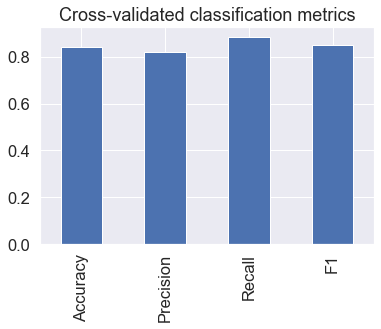

In [369]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

# Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our RandomForestClassifier model...



In [448]:
# Fit an instance of RandomForestClasifier
clf = RandomForestClassifier(max_depth= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 60)

clf.fit(X_train, y_train);

In [411]:
df_tmp.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,track_is_missing,artist_is_missing,uri_is_missing
0,5742,113,2121,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1,False,False,False
1,4880,976,4916,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0,False,False,False
2,3069,1863,1930,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1,False,False,False
3,3417,1612,520,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0,False,False,False
4,2693,3300,1491,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1,False,False,False


In [449]:
# Check feature_importance(because is a RandomForestclassifier, Random forest 
#is an ensemble of decision trees, it is not a linear model. Sklearn provides 
#importance of individual features which were used to train a random forest classifier or regressor. 
#It can be accessed as follows, and returns an array of decimals which sum to 1. 
#With a Logistic regression classifier use coef_
clf.feature_importances_

array([0.03049775, 0.03900209, 0.02971677, 0.08657405, 0.0795029 ,
       0.01753137, 0.09379303, 0.00520059, 0.04151179, 0.08719704,
       0.24713666, 0.03177949, 0.05704826, 0.03295138, 0.0626974 ,
       0.00597797, 0.03184859, 0.02003288, 0.        , 0.        ,
       0.        ])

the .feature_importances_ attribute just prints an array of numbers. It doesn’t tell you which numbers correspond to which variables. so Ill try...
I’ll run through a snippet of code that will return the feature importances in a DateFrame with their respective variable names.


In [453]:
import pandas as pd
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances

,importance
instrumentalness,0.247137
loudness,0.093793
acousticness,0.087197
danceability,0.086574
energy,0.079503
duration_ms,0.062697
valence,0.057048
speechiness,0.041512
artist,0.039002
tempo,0.032951


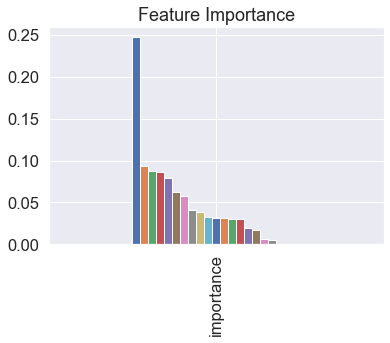

In [460]:
# Visualize feature importance
#feature_importances = pd.DataFrame(feature_dict, index=[0])
feature_importances.T.plot.bar(title="Feature Importance", legend=False);